In [305]:
#initializing
list_of_Trainloss_best_epoch=[0,0,0,0,0,0,0,0,0,0]
list_of_Validloss_best_epoch=[0,0,0,0,0,0,0,0,0,0]
list_of_Trainloss=[0,0,0,0,0,0,0,0,0,0]
list_of_Validloss=[0,0,0,0,0,0,0,0,0,0]
list_of_best_index=[0,0,0,0,0,0,0,0,0,0]
N_list_2=[]

In [487]:
N_list=[4000,3600,3200,2800,2400,2000,1600,1200,800,400]
N_list_2.append(N_list[len(N_list_2)])
# number of data
N=N_list_2[-1]
print(N)

400


In [488]:

import matplotlib.pyplot as plt
import numpy as np
# size of each sample
L=2
# box size
B=100

!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


2 5 1


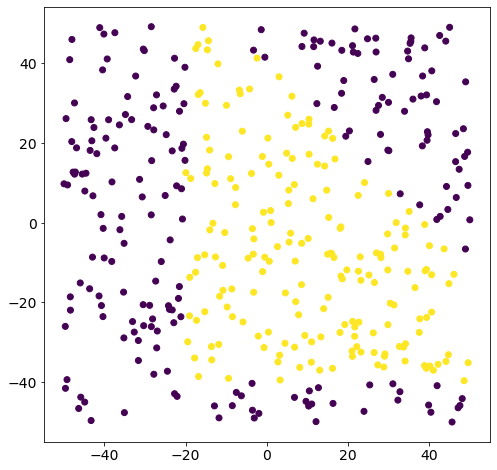

In [489]:
%run nonlinear_function.py

TYPE=1

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)

for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

In [490]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

%run nonlinear_function.py

# training data
perc_train = 0.8

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 400
train: 320


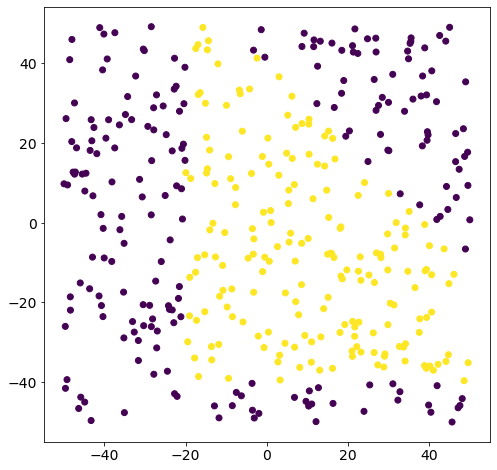

In [491]:
#keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

#dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [492]:
(x_train, y_train) = (x[0:N_train] , y[0:N_train])
(x_valid, y_valid) = (x[N_train:] , y[N_train:])
print('Train:',len(x_train),'\t Validation:',len(x_valid))

Train: 320 	 Validation: 80


In [493]:
def Rescale(x):
    return (x-x.mean())/np.sqrt(x.var())
    #return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [494]:
print((x_train[:,0]).max())


1.7431642564892464


In [495]:
#reproducibility
np.random.seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(3,activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 2)                 6         
                                                                 
 dense_97 (Dense)            (None, 20)                60        
                                                                 
 dense_98 (Dense)            (None, 20)                420       
                                                                 
 dropout_24 (Dropout)        (None, 20)                0         
                                                                 
 dense_99 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [496]:
model.compile(loss='binary_crossentropy',
             #optimizer='RMSprop'
             optimizer='adam',
             metrics=['accuracy'])

In [497]:
fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
7/7 - 1s - loss: 0.7760 - accuracy: 0.5094 - val_loss: 0.7948 - val_accuracy: 0.4750 - 711ms/epoch - 102ms/step
Epoch 2/400
7/7 - 0s - loss: 0.7556 - accuracy: 0.5094 - val_loss: 0.7677 - val_accuracy: 0.4750 - 46ms/epoch - 7ms/step
Epoch 3/400
7/7 - 0s - loss: 0.7309 - accuracy: 0.5063 - val_loss: 0.7453 - val_accuracy: 0.4750 - 51ms/epoch - 7ms/step
Epoch 4/400
7/7 - 0s - loss: 0.7234 - accuracy: 0.5156 - val_loss: 0.7258 - val_accuracy: 0.4875 - 52ms/epoch - 7ms/step
Epoch 5/400
7/7 - 0s - loss: 0.7088 - accuracy: 0.5375 - val_loss: 0.7096 - val_accuracy: 0.5500 - 50ms/epoch - 7ms/step
Epoch 6/400
7/7 - 0s - loss: 0.6972 - accuracy: 0.5781 - val_loss: 0.6957 - val_accuracy: 0.5625 - 53ms/epoch - 8ms/step
Epoch 7/400
7/7 - 0s - loss: 0.6894 - accuracy: 0.5562 - val_loss: 0.6831 - val_accuracy: 0.5875 - 57ms/epoch - 8ms/step
Epoch 8/400
7/7 - 0s - loss: 0.6874 - accuracy: 0.6125 - val_loss: 0.6716 - val_accuracy: 0.7000 - 53ms/epoch - 8ms/step
Epoch 9/400
7/7 - 0s - loss: 

Epoch 69/400
7/7 - 0s - loss: 0.4266 - accuracy: 0.7969 - val_loss: 0.4170 - val_accuracy: 0.8125 - 46ms/epoch - 7ms/step
Epoch 70/400
7/7 - 0s - loss: 0.4322 - accuracy: 0.7875 - val_loss: 0.4152 - val_accuracy: 0.8125 - 45ms/epoch - 6ms/step
Epoch 71/400
7/7 - 0s - loss: 0.4217 - accuracy: 0.7719 - val_loss: 0.4120 - val_accuracy: 0.8125 - 45ms/epoch - 6ms/step
Epoch 72/400
7/7 - 0s - loss: 0.4215 - accuracy: 0.8031 - val_loss: 0.4113 - val_accuracy: 0.8125 - 43ms/epoch - 6ms/step
Epoch 73/400
7/7 - 0s - loss: 0.4180 - accuracy: 0.7937 - val_loss: 0.4084 - val_accuracy: 0.8125 - 46ms/epoch - 7ms/step
Epoch 74/400
7/7 - 0s - loss: 0.4199 - accuracy: 0.8125 - val_loss: 0.4044 - val_accuracy: 0.8125 - 39ms/epoch - 6ms/step
Epoch 75/400
7/7 - 0s - loss: 0.4061 - accuracy: 0.8000 - val_loss: 0.4010 - val_accuracy: 0.8250 - 46ms/epoch - 7ms/step
Epoch 76/400
7/7 - 0s - loss: 0.4052 - accuracy: 0.8156 - val_loss: 0.3995 - val_accuracy: 0.8250 - 47ms/epoch - 7ms/step
Epoch 77/400
7/7 - 0s - 

Epoch 136/400
7/7 - 0s - loss: 0.2415 - accuracy: 0.9125 - val_loss: 0.2383 - val_accuracy: 0.9125 - 39ms/epoch - 6ms/step
Epoch 137/400
7/7 - 0s - loss: 0.2426 - accuracy: 0.9031 - val_loss: 0.2346 - val_accuracy: 0.9000 - 51ms/epoch - 7ms/step
Epoch 138/400
7/7 - 0s - loss: 0.2348 - accuracy: 0.9406 - val_loss: 0.2319 - val_accuracy: 0.9125 - 46ms/epoch - 7ms/step
Epoch 139/400
7/7 - 0s - loss: 0.2368 - accuracy: 0.9156 - val_loss: 0.2302 - val_accuracy: 0.9125 - 55ms/epoch - 8ms/step
Epoch 140/400
7/7 - 0s - loss: 0.2349 - accuracy: 0.9250 - val_loss: 0.2282 - val_accuracy: 0.9125 - 41ms/epoch - 6ms/step
Epoch 141/400
7/7 - 0s - loss: 0.2347 - accuracy: 0.9156 - val_loss: 0.2299 - val_accuracy: 0.9000 - 50ms/epoch - 7ms/step
Epoch 142/400
7/7 - 0s - loss: 0.2350 - accuracy: 0.9125 - val_loss: 0.2279 - val_accuracy: 0.9000 - 41ms/epoch - 6ms/step
Epoch 143/400
7/7 - 0s - loss: 0.2312 - accuracy: 0.9219 - val_loss: 0.2281 - val_accuracy: 0.9000 - 39ms/epoch - 6ms/step
Epoch 144/400
7/

Epoch 203/400
7/7 - 0s - loss: 0.1933 - accuracy: 0.9250 - val_loss: 0.1969 - val_accuracy: 0.9250 - 47ms/epoch - 7ms/step
Epoch 204/400
7/7 - 0s - loss: 0.1878 - accuracy: 0.9281 - val_loss: 0.1990 - val_accuracy: 0.8750 - 47ms/epoch - 7ms/step
Epoch 205/400
7/7 - 0s - loss: 0.1928 - accuracy: 0.9312 - val_loss: 0.1991 - val_accuracy: 0.8750 - 38ms/epoch - 5ms/step
Epoch 206/400
7/7 - 0s - loss: 0.1957 - accuracy: 0.9375 - val_loss: 0.1971 - val_accuracy: 0.9125 - 45ms/epoch - 6ms/step
Epoch 207/400
7/7 - 0s - loss: 0.1951 - accuracy: 0.9187 - val_loss: 0.1966 - val_accuracy: 0.9125 - 44ms/epoch - 6ms/step
Epoch 208/400
7/7 - 0s - loss: 0.1964 - accuracy: 0.9312 - val_loss: 0.1975 - val_accuracy: 0.8750 - 40ms/epoch - 6ms/step
Epoch 209/400
7/7 - 0s - loss: 0.1956 - accuracy: 0.9219 - val_loss: 0.1966 - val_accuracy: 0.8750 - 45ms/epoch - 6ms/step
Epoch 210/400
7/7 - 0s - loss: 0.1893 - accuracy: 0.9344 - val_loss: 0.1969 - val_accuracy: 0.9250 - 46ms/epoch - 7ms/step
Epoch 211/400
7/

Epoch 270/400
7/7 - 0s - loss: 0.1740 - accuracy: 0.9250 - val_loss: 0.1967 - val_accuracy: 0.9250 - 79ms/epoch - 11ms/step
Epoch 271/400
7/7 - 0s - loss: 0.1782 - accuracy: 0.9156 - val_loss: 0.1950 - val_accuracy: 0.9125 - 66ms/epoch - 9ms/step
Epoch 272/400
7/7 - 0s - loss: 0.1824 - accuracy: 0.9312 - val_loss: 0.1966 - val_accuracy: 0.9000 - 42ms/epoch - 6ms/step
Epoch 273/400
7/7 - 0s - loss: 0.1655 - accuracy: 0.9406 - val_loss: 0.1955 - val_accuracy: 0.8875 - 41ms/epoch - 6ms/step
Epoch 274/400
7/7 - 0s - loss: 0.1834 - accuracy: 0.9312 - val_loss: 0.1934 - val_accuracy: 0.8875 - 40ms/epoch - 6ms/step
Epoch 275/400
7/7 - 0s - loss: 0.1687 - accuracy: 0.9156 - val_loss: 0.1907 - val_accuracy: 0.9000 - 47ms/epoch - 7ms/step
Epoch 276/400
7/7 - 0s - loss: 0.1698 - accuracy: 0.9344 - val_loss: 0.1912 - val_accuracy: 0.9125 - 40ms/epoch - 6ms/step
Epoch 277/400
7/7 - 0s - loss: 0.1803 - accuracy: 0.9250 - val_loss: 0.1933 - val_accuracy: 0.9125 - 48ms/epoch - 7ms/step
Epoch 278/400
7

Epoch 337/400
7/7 - 0s - loss: 0.1663 - accuracy: 0.9375 - val_loss: 0.1898 - val_accuracy: 0.9000 - 47ms/epoch - 7ms/step
Epoch 338/400
7/7 - 0s - loss: 0.1606 - accuracy: 0.9281 - val_loss: 0.1898 - val_accuracy: 0.9000 - 41ms/epoch - 6ms/step
Epoch 339/400
7/7 - 0s - loss: 0.1666 - accuracy: 0.9250 - val_loss: 0.1903 - val_accuracy: 0.9000 - 44ms/epoch - 6ms/step
Epoch 340/400
7/7 - 0s - loss: 0.1670 - accuracy: 0.9281 - val_loss: 0.1900 - val_accuracy: 0.9125 - 47ms/epoch - 7ms/step
Epoch 341/400
7/7 - 0s - loss: 0.1635 - accuracy: 0.9406 - val_loss: 0.1897 - val_accuracy: 0.9250 - 38ms/epoch - 5ms/step
Epoch 342/400
7/7 - 0s - loss: 0.1687 - accuracy: 0.9281 - val_loss: 0.1905 - val_accuracy: 0.9250 - 48ms/epoch - 7ms/step
Epoch 343/400
7/7 - 0s - loss: 0.1582 - accuracy: 0.9250 - val_loss: 0.1933 - val_accuracy: 0.9000 - 40ms/epoch - 6ms/step
Epoch 344/400
7/7 - 0s - loss: 0.1666 - accuracy: 0.9438 - val_loss: 0.1911 - val_accuracy: 0.9125 - 46ms/epoch - 7ms/step
Epoch 345/400
7/

In [498]:
validation_loss = np.array(fit.history['val_loss'])
Training_loss = np.array(fit.history['loss'])
t=0
while (t==0) and (len(Training_loss)!=0):
    index = np.argmin(Training_loss)
    if fit.history['loss'][index]>=fit.history['val_loss'][index]:
        index_of_best_model=index
        t=1
        print(index)
    else:
        Training_loss=np.delete(Training_loss,index)
        
print(index_of_best_model)

279
279


In [499]:
        
list_of_best_index[N_list.index(N)]=index_of_best_model
list_of_Trainloss_best_epoch[N_list.index(N)]=fit.history['loss'][index_of_best_model]
list_of_Validloss_best_epoch[N_list.index(N)]=fit.history['val_loss'][index_of_best_model]
list_of_Trainloss[N_list.index(N)]=fit.history['loss'][-1]
list_of_Validloss[N_list.index(N)]=fit.history['val_loss'][-1]
print(list_of_best_index)


[375, 376, 393, 66, 373, 12, 397, 123, 36, 279]


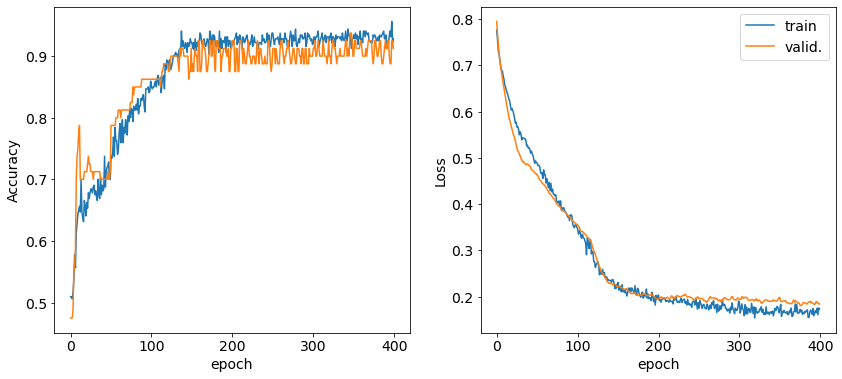

In [500]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
plt.savefig('plot_of _increase' + str(N_list.index(N)) + '.png')



In [501]:
import numpy as np
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))

k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])
print(grid)

# RESCALE
print(np.var(X1))
grid_r = (grid/50)*max(x_train[:,0])
print(grid_r)

pred = model.predict(grid_r)

51 2601
[50. 50.]
[[-50. -50.]
 [-48. -50.]
 [-46. -50.]
 ...
 [ 46.  50.]
 [ 48.  50.]
 [ 50.  50.]]
866.6666666666666
[[-1.74316426 -1.74316426]
 [-1.67343769 -1.74316426]
 [-1.60371112 -1.74316426]
 ...
 [ 1.60371112  1.74316426]
 [ 1.67343769  1.74316426]
 [ 1.74316426  1.74316426]]


9


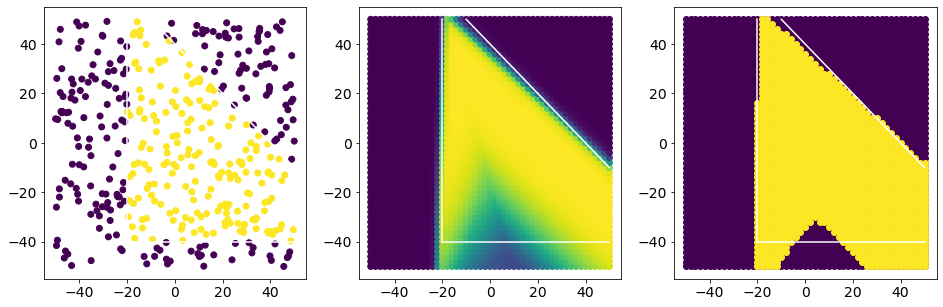

In [502]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")

ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show
plt.savefig('result_of _increase' + str(N_list.index(N)) + '.png')
print(N_list.index(N))

In [503]:
print("Trainloss",list_of_Trainloss)
print("Validloss",list_of_Validloss)
np.savetxt(filename("Trainloss_increase",TYPE),list_of_Trainloss)
np.savetxt(filename("Validloss_increase",TYPE),list_of_Validloss)

Trainloss [0.022012239322066307, 0.15920819342136383, 0.062363915145397186, 0.15732645988464355, 0.22002045810222626, 0.16265587508678436, 0.0737156867980957, 0.16068774461746216, 0.1736259162425995, 0.17286960780620575]
Validloss [0.013728125020861626, 0.14924593269824982, 0.07585166394710541, 0.1891978234052658, 0.22255975008010864, 0.21534456312656403, 0.06066405028104782, 0.20040938258171082, 0.3767033517360687, 0.18392418324947357]


In [504]:
print("Trainloss_best_epoch",list_of_Trainloss_best_epoch)
print("Validloss_best_epoch",list_of_Validloss_best_epoch)
np.savetxt(filename("Trainloss_increase_best_epoch",TYPE),list_of_Trainloss_best_epoch)
np.savetxt(filename("Validloss_increase_best_epoch",TYPE),list_of_Validloss_best_epoch)


Trainloss_best_epoch [0.020722636952996254, 0.15499363839626312, 0.06709824502468109, 0.17446289956569672, 0.2199995219707489, 0.30983036756515503, 0.07194943726062775, 0.19548410177230835, 0.48754772543907166, 0.19366639852523804]
Validloss_best_epoch [0.017519202083349228, 0.14399632811546326, 0.0657832995057106, 0.1732385754585266, 0.21889406442642212, 0.30653345584869385, 0.06055102497339249, 0.1891043782234192, 0.4856945872306824, 0.19160643219947815]


(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

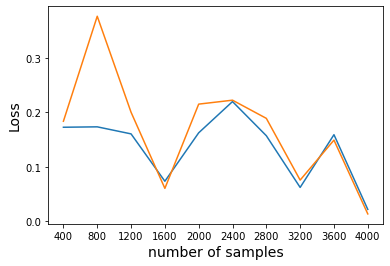

In [505]:
M=list(reversed(N_list))
MM=list(reversed(list_of_Trainloss))
MM2=list(reversed(list_of_Validloss))
NN=[0,1,2,3,4,5,6,7,8,9]
plt.plot(M,MM)
plt.plot(M,MM2)
#plt.show()
plt.xlabel("number of samples")
plt.ylabel("Loss")
plt.xticks(M,fontsize=10)
plt.yticks(fontsize=10)

#plt.savefig('plot_increase.png')

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

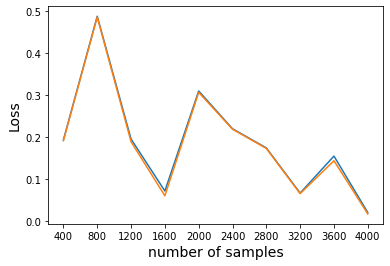

In [506]:
M=list(reversed(N_list))
MM=list(reversed(list_of_Trainloss_best_epoch))
MM2=list(reversed(list_of_Validloss_best_epoch))
NN=[0,1,2,3,4,5,6,7,8,9]
plt.plot(M,MM)
plt.plot(M,MM2)
#plt.show()
plt.xlabel("number of samples")
plt.ylabel("Loss")
plt.xticks(M,fontsize=10)
plt.yticks(fontsize=10)

#plt.savefig('plot_increase.png')


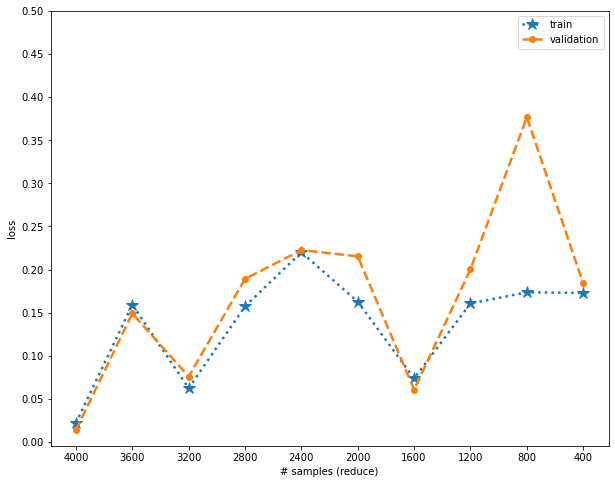

In [15]:
def filename(s,TYPE=1):
    return "./DATA/"+s+"-for-DNN-"+str(TYPE)+".dat"
TYPE=1
import numpy as np
import matplotlib.pyplot as plt
N_list=[4000,3600,3200,2800,2400,2000,1600,1200,800,400]
M=[0,1,2,3,4,5,6,7,8,9]
x = np.loadtxt(filename("Trainloss_increase",TYPE), delimiter=' ')
y = np.loadtxt(filename("Validloss_increase",TYPE), delimiter=' ')
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(M,x, label = 'train', linestyle = 'dotted', marker = '*', markersize = 12,linewidth ='2.5')
ax.plot(M,y, label = 'validation',linestyle = 'dashed', marker = '.',markersize = 12, linewidth ='2.5')
ax.set_xlabel('# samples (reduce)')
ax.set_ylabel('loss')
ax.set_xticks(M)
ax.set_xticklabels(N_list)
r2=[0.0,0.050,0.100,0.150,0.200,0.250,0.300,0.350,0.400,0.450,0.500]
ax.set_yticks(r2)


plt.legend(loc = 'best')
plt.savefig('plot_reduce.png')

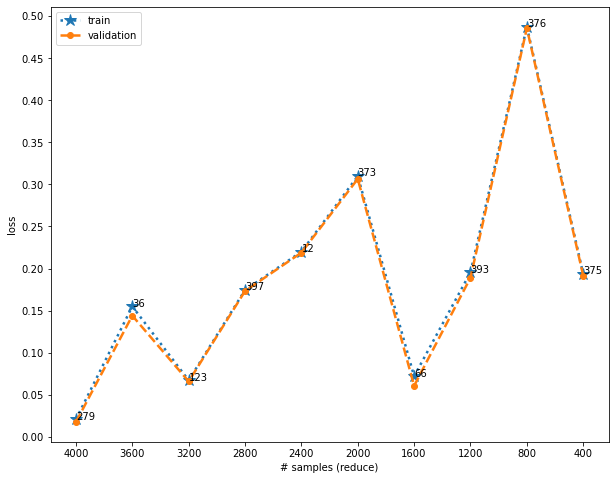

In [16]:
x = np.loadtxt(filename("Trainloss_increase_best_epoch",TYPE), delimiter=' ')
y = np.loadtxt(filename("Validloss_increase_best_epoch",TYPE), delimiter=' ')
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(M,x, label = 'train', linestyle = 'dotted', marker = '*', markersize = 12,linewidth ='2.5')
ax.plot(M,y, label = 'validation',linestyle = 'dashed', marker = '.',markersize = 12, linewidth ='2.5')
ax.set_xlabel('# samples (reduce)')
ax.set_ylabel('loss')
ax.set_xticks(M)
ax.set_xticklabels(N_list)
r2=[0.0,0.050,0.100,0.150,0.200,0.250,0.300,0.350,0.400,0.450,0.500]
ax.set_yticks(r2)
list_of_best_index=[375, 376, 393, 66, 373, 12, 397, 123, 36, 279]
r=list(reversed(list_of_best_index))
list_of_Trainloss_best_epoch= [0.020722636952996254, 0.15499363839626312, 0.06709824502468109, 0.17446289956569672, 0.2199995219707489, 0.30983036756515503, 0.07194943726062775, 0.19548410177230835, 0.48754772543907166, 0.19366639852523804]

for i, txt in enumerate(r):
    ax.annotate(txt, xy = (M[i], list_of_Trainloss_best_epoch[i]))

plt.legend(loc = 'best')
plt.savefig('plot_reduce_best_epoch.png')